In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from matplotlib import pyplot as plt
from nltk.probability import FreqDist
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r"dataset\processed\kmeans_result.csv")

In [3]:
df.head()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,id,edit_history_tweet_ids,created_at,text,author_id,Unnamed: 0,text_cleaned,text_cleaned_stemmed,mdhugol_sentiment,mdhugol_sentiment_score,indobert_sentiment,indobert_sentiment_score,cs_embeddings,assigned_cluster
0,0,0,0,1880655687866552831,1880655687866552831,2025-01-18T16:37:11.000Z,Ketua Umum PDIP Megawati Soekarnoputri sempat ...,917707622026928129,NaN,ketua umum pdip megawati soekarnoputri sempat ...,ketua umum pdip megawati soekarnoputri sempat ...,neutral,0.989232,Neutral,0.999553,[ 7.43569210e-02 2.20975489e-03 2.31713668e-...,3
1,1,1,1,1880655628819165446,1880655628819165446,2025-01-18T16:36:57.000Z,@HabilIsl Hold $WOWO dapat airdrop makan siang...,112500656,NaN,hold wowo dapat airdrop makansianggratis,hold wowo dapat airdrop makansianggratis,positive,0.912627,Neutral,0.999512,[-3.22193466e-02 5.96734770e-02 2.74469018e-...,4
2,2,2,2,1880655540717842742,1880655540717842742,2025-01-18T16:36:36.000Z,KALAU MBG NYA INI GUE JUGA MAU DUT BIAR GUE MU...,1266052828742602752,NaN,kalau mbg nya ini gue juga mau dut biar gue mu...,kalau mbg nya ini gue juga mau dut biar gue mu...,negative,0.982285,Negative,0.999828,[-1.37586994e-02 8.19337815e-02 2.12110225e-...,2
3,3,3,3,1880655480122651014,1880655480122651014,2025-01-18T16:36:22.000Z,@neohistoria_id program MBG tuh B nya Bersyuku...,1838116873331945472,NaN,program mbg tuh b nya bersyukur bukan bergizi,program mbg tuh b nya syukur bukan gizi,negative,0.985092,Negative,0.996238,[-1.39692530e-01 -1.47069255e-02 2.70044863e-...,0
4,4,4,4,1880655463207117137,1880655463207117137,2025-01-18T16:36:17.000Z,@03__nakula Ga semua anak Indonesia bisa makan...,1511016593353936896,NaN,enggak semua anak indonesia bisa makan siang ...,enggak semua anak indonesia bisa makan siang i...,negative,0.990175,Neutral,0.564391,[-0.06567369 0.06387163 0.13421394 -0.034681...,1


In [4]:
df['tokens'] = df['text_cleaned_stemmed'].apply(lambda x: wordpunct_tokenize(x))

In [5]:
f = open("id.stopwords.02.01.2016.txt", "r")
stopword_list = []
for line in f:
    stripped_line = line.strip()
    line_list = stripped_line.split()
    stopword_list.append(line_list[0])
f.close()

stopword_list.append("nya")
stopword_list.append("ya")

len(stopword_list)

760

In [6]:
excluded_words = ["makanbergizigratis", "makansianggratis", "mbg", "makan", "program", "gratis", "siang"]

In [7]:
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stopword_list])
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in excluded_words])

In [8]:
all_tokens_per_cluster = {}

for i in range(len(df["assigned_cluster"].unique())):
    all_tokens = [token for tokens_list in df['tokens'][df['assigned_cluster']==i] for token in tokens_list]
    all_tokens_per_cluster[i] = all_tokens
    del all_tokens

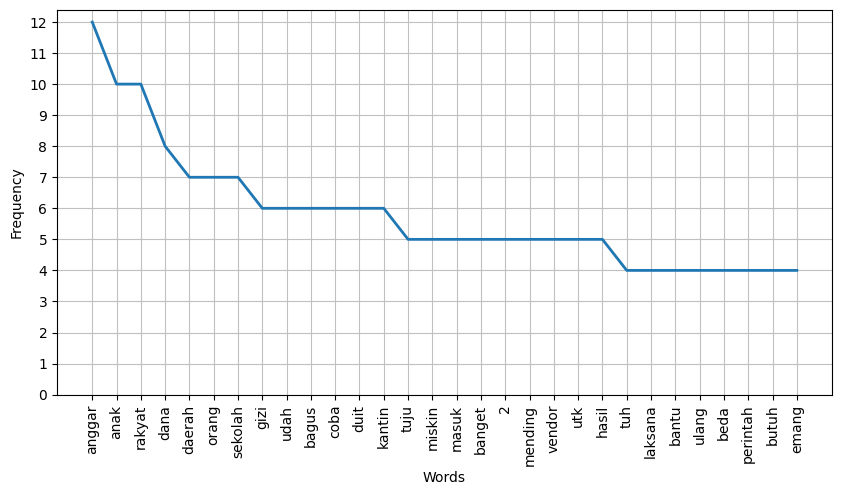

In [9]:
# Calculate word frequency
freq_dist = FreqDist(all_tokens_per_cluster[0])
# Plot the most common words
plt.figure(figsize=(10, 5))
freq_dist.plot(30, cumulative=False)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.yticks(np.arange(0,freq_dist[freq_dist.max()]+1,step=1))
plt.show()

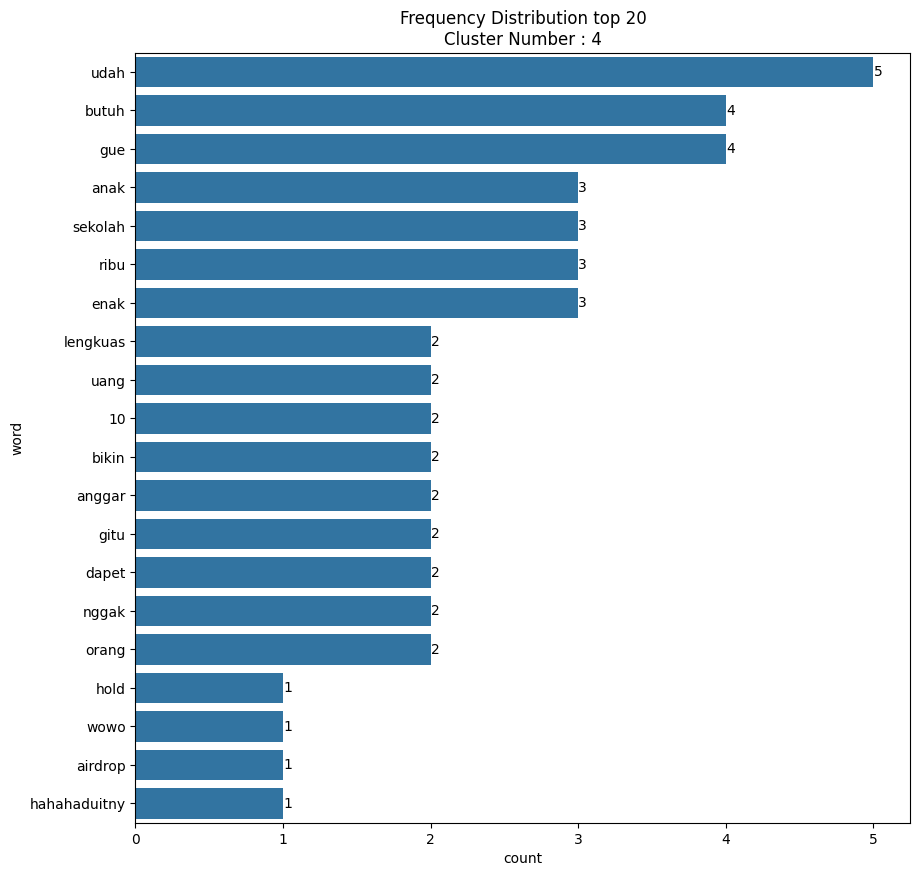

In [12]:
index_chosen=4
freq_dist = FreqDist(all_tokens_per_cluster[index_chosen])
new_freq_dist = freq_dist.most_common(20)
reverse_sort=True
# Sort values by highest frequency
fd_sorted = {k:v for k,v in sorted(new_freq_dist, key=lambda item:item[1], reverse=reverse_sort)}

## Convert to Pandas series for easy plotting
fd_series = pd.Series(fd_sorted)

## Setting figure & ax for plots
fig, ax = plt.subplots(figsize=(10,10))

## Setting plot to horizontal for easy viewing + setting title + display  
bar_plot = sns.barplot(x=fd_series.values, y=fd_series.index, orient='h', ax=ax)
ax.bar_label(ax.containers[0])

plt.title('Frequency Distribution top 20\nCluster Number : {}'.format(index_chosen))
plt.xlabel("count")
plt.ylabel("word")
plt.show()

In [13]:
freqtable = pd.DataFrame(columns=["word","count"])

for i in (df["assigned_cluster"].unique()):
    index_chosen=i
    freq_dist = FreqDist(all_tokens_per_cluster[index_chosen])
    new_freq_dist = freq_dist.most_common(20)
    reverse_sort=True
    # Sort values by highest frequency
    fd_sorted = {k:v for k,v in sorted(new_freq_dist, key=lambda item:item[1], reverse=reverse_sort)}

    ## Convert to Pandas series for easy plotting
    fd_series = pd.Series(fd_sorted)
    
    newft = pd.DataFrame(fd_series,columns=["count"]).reset_index().rename(columns={"index":"word"})
    newft["assigned_clusters"] = i
    newft["assigned_clusters"] = newft["assigned_clusters"].astype(int)
    freqtable = pd.concat([freqtable,newft])

freqtable = freqtable[["assigned_clusters","word","count"]]

In [14]:
freqtable

,assigned_clusters,word,count
0,3.0,gizi,18
1,3.0,perintah,17
2,3.0,anak,12
3,3.0,indonesia,12
4,3.0,menu,10
...,...,...,...
15,1.0,gas,5
16,1.0,kaya,4
17,1.0,dapet,4
18,1.0,pajak,4


In [17]:
freqtable.to_csv(r"dataset\processed\wordcount_by_cluster.csv")

In [18]:
freqtable.to_excel(r"dataset\processed\wordcount_by_cluster.xlsx")